In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from fbprophet import Prophet
mpl.rc('font', family='Malgun Gothic')

In [400]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [401]:
train.drop(train[train['석식계']==0].index,axis=0,inplace=True)

In [402]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [403]:
test.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
45,2021-04-05,월,2973,125,174,704,331.0,모닝롤/커피콩빵 우유/주스 계란후라이 누룽지탕/흑미밥 청양콩나물국 스팸구이 양상추샐...,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비 오지치즈후라이 가지두반장볶음 포기김치 ...,흑미밥 돈육고추장찌개 갈치구이 김치전 취나물무침 깍두기
46,2021-04-06,화,2973,76,170,636,364.0,모닝롤/모닝샌드 우유/주스 계란후라이 고구마스프/흑미밥 아욱국 참치채소볶음 양상추샐...,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜 깻잎완자전 돌나물초장무침 포기김치 시리...,추가밥 짬뽕*생면 수제찹쌀꿔바로우 메추리알곤약장조림 단무지무침 포기김치
47,2021-04-07,수,2973,96,214,1,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기 비빔냉면 오이나물볶음 겉절이김치 양상추샐...,단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치
48,2021-04-08,목,2973,105,238,509,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 (New)로제찜닭 가자미구이*장 유채나물무침 포기김...,흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음
49,2021-04-09,금,2973,259,268,0,229.0,모닝롤/토마토샌드 우유/주스 계란후라이 채소죽/흑미밥 대구지리 애호박나물볶음 양상추...,쌀밥/흑미밥/찰현미밥 사골우거지국 해물누룽지탕 청포묵*양념간장 비름나물고추장무침 석...,흑미밥 맑은버섯국 매운사태조림 춘권*타르타르D 열무나물무침 포기김치


In [404]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [405]:
test.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
dtype: int64

In [406]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(train['일자'])

In [407]:
train['year'] = train['일자'].dt.year
train['month'] = train['일자'].dt.month
train['weekday'] = train['일자'].dt.weekday
train['day'] = train['일자'].dt.day
train.drop(['일자','요일'],axis=1,inplace=True)

test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['weekday'] = test['일자'].dt.weekday
test['day'] = test['일자'].dt.day
test.drop(['일자','요일'],axis=1,inplace=True)


In [408]:
train.drop(['조식메뉴','중식메뉴','석식메뉴'],axis=1,inplace=True)

test.drop(['조식메뉴','중식메뉴','석식메뉴'],axis=1,inplace=True)

In [409]:
xx =train.loc[(train['year']>=2020)]

C:\Users\a\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

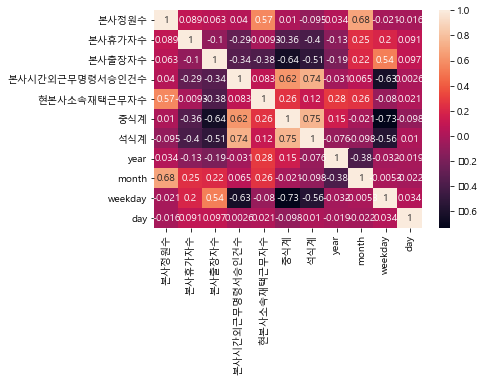

In [410]:
sns.heatmap(xx.corr(),annot=True)

In [411]:
train['코로나'] = 0
train.loc[train['현본사소속재택근무자수']>=40,'코로나']=1
train['코로나'] = train['코로나'].astype("category")
# train['코로나_cat'] = 0
# train.loc[(train['현본사소속재택근무자수']>=100) & (train['현본사소속재택근무자수']<200),'코로나_cat'] = 1
# train.loc[(train['현본사소속재택근무자수']>=200) & (train['현본사소속재택근무자수']<300),'코로나_cat'] = 2
# train.loc[(train['현본사소속재택근무자수']>=300),'코로나_cat'] = 3
# train['코로나_cat'] = train['코로나_cat'].astype('category')
train['실근무자'] = train['본사정원수'] - train['현본사소속재택근무자수']

In [412]:
train['weekday'] = train['weekday'].astype('category')

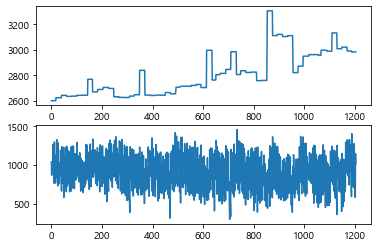

In [418]:
plt.subplot(2,1,1)
plt.plot(train['본사정원수'])
plt.subplot(2,1,2)
plt.plot(train['중식계'])

C:\Users\a\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

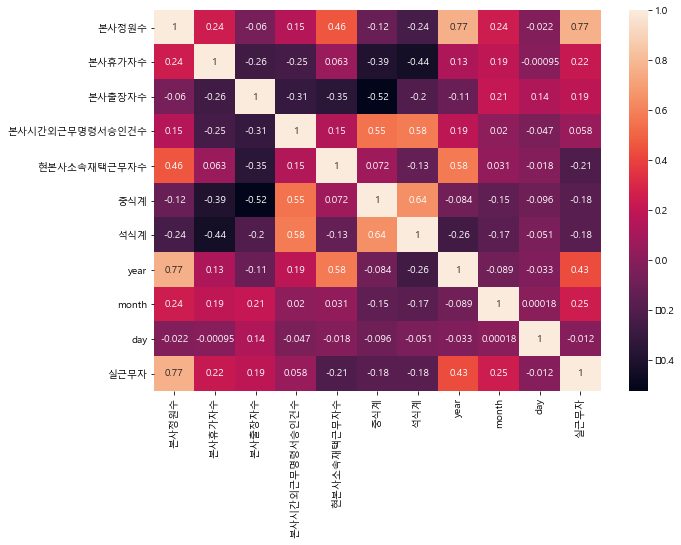

In [388]:
plt.figure(figsize=(10,7))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(),annot=True,square=False)

In [389]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [419]:
c_train = train.copy()
c_train.drop(['year','day'],axis=1,inplace=True)

X = c_train.drop(['중식계','석식계','본사정원수'],axis=1,inplace=False)
y1 = c_train['중식계']
y2 = c_train['석식계']

In [421]:
from sklearn.preprocessing import StandardScaler
cols = ['본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무자']
for col in cols:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(np.array(X[col]).reshape(-1,1))

In [422]:
for col in cols:
    upper = X[col].describe()['75%']
    lower = X[col].describe()['25%']
    IQR = 1.8*(upper-lower)
    
    X.loc[(X[col]>(lower-IQR)) & (X[col]<(upper+IQR))]

In [423]:
X.head()

,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,month,weekday,코로나,실근무자
0,-0.752302,-2.076931,-0.188500,-0.402953,2,0,0,-1.043424
1,-0.752302,-1.550244,0.142205,-0.402953,2,1,0,-1.043424
2,-0.710817,-1.389948,-0.707013,-0.402953,2,2,0,-1.043424
3,-0.378936,-0.473971,0.289185,-0.402953,2,3,0,-1.043424
4,0.824133,-1.367049,-1.021387,-0.402953,2,4,0,-1.043424


In [426]:
X.head()

,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,month,weekday,코로나,실근무자
0,-0.752302,-2.076931,-0.188500,-0.402953,2,0,0,-1.043424
1,-0.752302,-1.550244,0.142205,-0.402953,2,1,0,-1.043424
2,-0.710817,-1.389948,-0.707013,-0.402953,2,2,0,-1.043424
3,-0.378936,-0.473971,0.289185,-0.402953,2,3,0,-1.043424
4,0.824133,-1.367049,-1.021387,-0.402953,2,4,0,-1.043424


In [427]:
Kfold = KFold(n_splits = 5,shuffle=True)
t_1 = []
t_2 = []
t_3 = []
t_4 = []
for train_idx, test_idx in Kfold.split(X):
    X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
    y1_train,y1_test = y1.iloc[train_idx],y1.iloc[test_idx]
    y2_train,y2_test = y2.iloc[train_idx],y2.iloc[test_idx]
    
    
    rnd_reg_1 = RandomForestRegressor(max_features = len(X.columns))
    rnd_reg_2 = RandomForestRegressor(max_features = len(X.columns))
    lin_reg_1 = LinearRegression()
    lin_reg_2 = LinearRegression()
    rnd_reg_1 = rnd_reg_1.fit(X_train,y1_train)
    rnd_reg_2 = rnd_reg_2.fit(X_train,y2_train)
    lin_reg_1 = lin_reg_1.fit(X_train,y1_train)
    lin_reg_2 = lin_reg_2.fit(X_train,y2_train)
    pred_1 = rnd_reg_1.predict(X_test)
    pred_2 = rnd_reg_2.predict(X_test)
    pred_3 = lin_reg_1.predict(X_test)
    pred_4 = lin_reg_2.predict(X_test)
    score_1 = mean_absolute_error(y1_test,pred_1)
    score_2 = mean_absolute_error(y2_test,pred_2)
    score_3 = mean_absolute_error(y1_test,pred_3)
    score_4 = mean_absolute_error(y2_test,pred_4)
    t_1.append(score_1)
    t_2.append(score_2)
    t_3.append(score_3)
    t_4.append(score_4)
    print('RandomForest 중식계 : ',score_1)
    print('RandomForest 석식계 : ',score_2)
    print('Linear 중식계 : ',score_3)
    print('Linear 석식계 : ',score_4)
    print('\n\n')
    
print('RandomForest 중식계 평균 : ',np.mean(t_1))
print('RandomForest 석식계 평균 : ',np.mean(t_2))
print('\n')
print('LinearRegression 중식계 평균 : ',np.mean(t_3))
print('LinearRegression 석식계 평균 : ',np.mean(t_4))

RandomForest 중식계 :  67.92523605150214
RandomForest 석식계 :  48.47862660944206
Linear 중식계 :  87.13448969348961
Linear 석식계 :  53.77517096279559



RandomForest 중식계 :  71.0031330472103
RandomForest 석식계 :  48.719270386266096
Linear 중식계 :  90.38467547188834
Linear 석식계 :  59.286906189311104



RandomForest 중식계 :  71.23474137931035
RandomForest 석식계 :  46.94487068965517
Linear 중식계 :  83.42500089385601
Linear 석식계 :  51.39367010276417



RandomForest 중식계 :  78.83150862068963
RandomForest 석식계 :  46.70353448275862
Linear 중식계 :  88.46505954082456
Linear 석식계 :  54.756929404170755



RandomForest 중식계 :  65.48655172413794
RandomForest 석식계 :  48.914482758620686
Linear 중식계 :  86.39374010167943
Linear 석식계 :  56.793876268346644



RandomForest 중식계 평균 :  70.89623416457007
RandomForest 석식계 평균 :  47.95215698534853


LinearRegression 중식계 평균 :  87.16059314034759
LinearRegression 석식계 평균 :  55.20131058547766


In [88]:
test.drop(['현본사소속재택근무자수','year','day'],axis=1,inplace=True)

In [245]:
rnd_reg_1 = RandomForestRegressor()
rnd_reg_2 = RandomForestRegressor()
rnd_reg_1 = rnd_reg_1.fit(X,y1)
rnd_reg_2 = rnd_reg_2.fit(X,y2)
pred_1 = rnd_reg_1.predict(test)
pred_2 = rnd_reg_2.predict(test)

In [114]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg_1 = lin_reg.fit(X,y1)
lin_reg_2 = lin_reg.fit(X,y2)

pred_1 = lin_reg_1.predict(test)
pred_2 = lin_reg_2.predict(test)


In [246]:
submission['중식계'] = pred_1
submission['석식계'] = pred_2
submission.set_index('일자',drop=True,inplace=True)
submission.to_csv('sample_submission.csv')

In [120]:
submission

,중식계,석식계
일자,,
2021-01-27,1131.462,319.283
2021-01-28,1001.277,443.844
2021-01-29,779.337,234.436
2021-02-01,1030.840,516.042
2021-02-02,996.994,474.620
2021-02-03,931.057,372.860
2021-02-04,989.800,474.669
2021-02-05,1073.009,270.778
2021-02-08,987.910,622.378


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


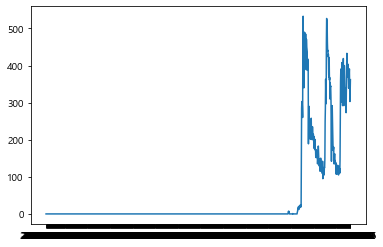

In [279]:
plt.plot(train['일자'],train['현본사소속재택근무자수'])

In [285]:
train['month'] = [x.month for x in train['일자']]
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1


In [281]:
train['일자'] = pd.to_datetime(train['일자'])
df_1 = train[['일자','중식계']]
df_2 = train[['일자','석식계']]

df_1.columns = ['ds','y']
df_2.columns = ['ds','y']


In [214]:
m_1 = Prophet()
m_2 = Prophet()
m_1 = m_1.fit(df_1)
m_2 = m_2.fit(df_2)
forecast = m_1.make_future_dataframe(periods=len(test)*10)


forecast_1 = m_1.predict(forecast)
forecast_2 = m_2.predict(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


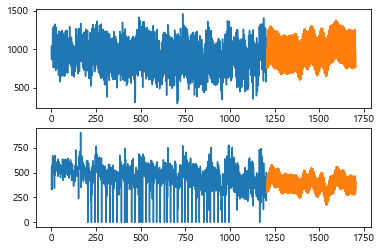

In [215]:
plt.subplot(2,1,1)
plt.plot(train['중식계'])
plt.plot(forecast_1['yhat'][len(train):])

plt.subplot(2,1,2)
plt.plot(train['석식계'])
plt.plot(forecast_2['yhat'][len(train):])

In [228]:
forecast_1.loc[forecast_1['yhat']<forecast_1['trend'],'scaled_yhat'] = forecast_1['yhat_lower']*0.8
forecast_1.loc[forecast_1['yhat']>=forecast_1['trend'],'scaled_yhat'] = forecast_1['yhat']

forecast_2.loc[forecast_2['yhat']<forecast_2['trend'],'scaled_yhat'] = forecast_2['yhat_lower']*0.7
forecast_2.loc[forecast_2['yhat']>=forecast_2['trend'],'scaled_yhat'] = forecast_2['yhat_upper']

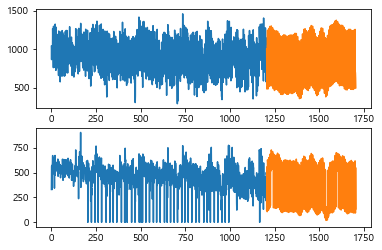

In [229]:
plt.subplot(2,1,1)
plt.plot(train['중식계'])
plt.plot(forecast_1['scaled_yhat'][len(train):])

plt.subplot(2,1,2)
plt.plot(train['석식계'])
plt.plot(forecast_2['scaled_yhat'][len(train):])

In [170]:
train['조식메뉴'][1].split()

['모닝롤/단호박샌드',
 '우유/두유/주스',
 '계란후라이',
 '팥죽/쌀밥',
 '(쌀:국내산)',
 '호박젓국찌개',
 '시래기조림',
 '포기김치',
 '(배추,고추가루:국내산)']

In [171]:
d = 0
for i in range(len(train)):
    print(train['조식메뉴'][i].split()[3])
        


호두죽/쌀밥
팥죽/쌀밥
표고버섯죽/쌀밥
닭죽/쌀밥
쇠고기죽/쌀밥
견과류죽/쌀밥
고구마죽/쌀밥
잣죽/쌀밥
단호박죽/쌀밥
흑임자죽/쌀밥
계란후라이
밤죽/쌀밥
브로컬리죽/쌀밥
닭죽/쌀밥
김치죽/쌀밥
쇠고기죽/쌀밥
밤죽/쌀밥
호두죽/쌀밥
참치야채죽/쌀밥
팥죽/쌀밥
야채죽/쌀밥
땅콩죽/쌀밥
새송이죽/쌀밥
단호박죽/쌀밥
녹두죽/쌀밥
고구마죽/쌀밥
흑임자죽/쌀밥
해물죽/쌀밥
홍게살죽/쌀밥
브로컬리죽/쌀밥
표고버섯죽/쌀밥
김치죽/쌀밥
참치야채죽/쌀밥
새송이버섯죽/쌀밥
밤죽/쌀밥
견과류죽/쌀밥
새우살죽/쌀밥
야채죽/쌀밥
닭죽/쌀밥
늙은호박죽/쌀밥
녹두죽/쌀밥
잣죽/쌀밥
양송이죽/쌀밥
팥죽/쌀밥
흑임자죽/쌀밥
고구마죽/쌀밥
견과류죽/쌀밥
쇠고기죽/쌀밥
브로컬리죽/쌀밥
새우살죽/쌀밥
흑임자죽/쌀밥
표고버섯죽/쌀밥
홍게살죽/쌀밥
늙은호박죽/쌀밥
고구마죽/쌀밥
땅콩죽/쌀밥
녹두죽/쌀밥
닭죽/쌀밥
표고버섯죽/쌀밥
김치죽/쌀밥
야채죽/쌀밥
팥죽/쌀밥
밤죽/쌀밥
호두죽/쌀밥
브로컬리죽/쌀밥
홍게살죽/쌀밥
야채죽/쌀밥
흑임자죽/쌀밥
잣죽/쌀밥
새우살죽/쌀밥
쇠고기죽/쌀밥
양송이죽/쌀밥
단호박죽/쌀밥
땅콩죽/쌀밥
녹두죽/쌀밥
김치죽/쌀밥
소라살죽/쌀밥
밤죽/쌀밥
흑임자죽/쌀밥
새우살죽/쌀밥
팥죽/쌀밥
야채죽/쌀밥
홍게살죽/쌀밥
견과류죽/쌀밥
고구마죽/쌀밥
늙은호박죽/쌀밥
참치야채죽/쌀밥
잣죽/쌀밥
녹두죽/쌀밥
쇠고기죽/쌀밥
표고버섯죽/쌀밥
닭죽/쌀밥
야채죽/쌀밥
흑임자죽/쌀밥
팥죽/쌀밥
계란후라이
밤죽/쌀밥
땅콩죽/쌀밥
녹두죽/쌀밥
잣죽/쌀밥
단호박죽/쌀밥
브로컬리죽/쌀밥
호두죽/쌀밥
표고버섯죽/쌀밥
닭죽/쌀밥
쇠고기죽/쌀밥
김치죽/쌀밥
흑임자죽/쌀밥
홍게살죽/쌀밥
참치야채죽/쌀밥
새송이죽/쌀밥
팥죽/쌀밥
땅콩죽/쌀밥
녹두죽/쌀밥
양송이죽/쌀밥
해물죽/쌀밥
닭죽/쌀밥
누룽지탕/쌀밥
김치죽/쌀밥
누룽지탕/쌀밥
새우살죽/쌀밥
쇠고기죽/쌀밥
보리누룽지탕/쌀밥
단호박죽/쌀밥
누룽지탕/쌀밥
야채죽/쌀밥
홍게살죽/쌀밥
누룽지탕/쌀밥
야채죽/쌀밥
누룽지탕/쌀밥
녹두죽/쌀밥
해물죽/쌀밥
잣죽/쌀밥
누룽지탕

In [172]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [232]:
con_cols= ['본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수']
for col in con_cols:
    print(len(train[train[col]<0]))

0
0
0
0
0


In [245]:
train['실근무자수'] = train['본사정원수']-train['본사휴가자수']-train['본사출장자수']-train['현본사소속재택근무자수']
test['실근무자수'] = test['본사정원수']-test['본사휴가자수']-test['본사출장자수']-test['현본사소속재택근무자수']

In [266]:
train['요일'] = train['요일'].replace({'월' : 0, '화' : 1, '수' : 2, '목' : 3, '금' : 4})
train['요일'] = train['요일'].astype('category')
test['요일'] = test['요일'].replace({'월' : 0, '화' : 1, '수' : 2, '목' : 3, '금' : 4})
test['요일'] = test['요일'].astype('category')

In [247]:
train['sin_weekday'] = np.sin(2*np.pi*train['요일']/6)
train['cos_weekday'] = np.cos(2*np.pi*train['요일']/6)
test['sin_weekday'] = np.sin(2*np.pi*test['요일']/6)
test['cos_weekday'] = np.cos(2*np.pi*test['요일']/6)

In [263]:
train= train.drop(train[train['석식계']==0].index,axis=0)
train.reset_index(drop=True,inplace=True)

In [176]:
# from sklearn.preprocessing import StandardScaler
# for col in ['본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수']:
#     scaler = StandardScaler()
#     train[col] = scaler.fit_transform(np.array(train[col]).reshape(-1,1))


In [269]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
Kfold = KFold(n_splits=5,shuffle=True,random_state=42)
X = train.drop(['중식계','석식계','일자','조식메뉴','중식메뉴','석식메뉴','실근무자수','sin_weekday','cos_weekday'],axis=1,inplace=False)
y_1 = train['중식계']
y_2 = train['석식계']
total_score_1 = []
total_score_2 = []
for train_idx,test_idx in Kfold.split(X):
    X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
    y_1_train,y_1_test = y_1.iloc[train_idx],y_1.iloc[test_idx]
    y_2_train,y_2_test = y_2.iloc[train_idx],y_2.iloc[test_idx]
    
    lgb_1_reg = LGBMRegressor(learning_rate=0.07)
    lgb_2_reg = LGBMRegressor(learning_rate=0.07)

    
    lgb_1_reg = lgb_1_reg.fit(X_train,y_1_train)
    lgb_2_reg = lgb_2_reg.fit(X_train,y_2_train)

    pred_1 = lgb_1_reg.predict(X_test)
    pred_2 = lgb_2_reg.predict(X_test)

    
    score_1 = mean_absolute_error(y_1_test,pred_1)
    score_2 = mean_absolute_error(y_2_test,pred_2)
    total_score_1.append(score_1)
    total_score_2.append(score_2)

    print('lgbm_중식계 : ',score_1)
    print('lgbm_석식계 : ',score_2)
    print('\n')
    
    

lgbm_중식계 :  72.78933095031705
lgbm_석식계 :  44.92042867607763


lgbm_중식계 :  76.41204510338797
lgbm_석식계 :  52.261699300880494


lgbm_중식계 :  72.53737131051724
lgbm_석식계 :  49.815455825295324


lgbm_중식계 :  70.80822757385876
lgbm_석식계 :  47.6018940282885


lgbm_중식계 :  71.3080846669525
lgbm_석식계 :  45.08998111953103




In [270]:
print('중식계 : ',np.mean(total_score_1))
print('석식계 : ',np.mean(total_score_2))

중식계 :  72.7710119210067
석식계 :  47.9378917900146


In [151]:
X = train.drop(['중식계','석식계','일자','조식메뉴','중식메뉴','석식메뉴','실근무자수'],axis=1,inplace=False)
test.drop(['일자','조식메뉴','중식메뉴','석식메뉴','실근무자수'],axis=1,inplace=True)
y_1 = train['중식계']
y_2 = train['석식계']



lgb_1_reg = LGBMRegressor(learning_rate=0.07)
lgb_2_reg = LGBMRegressor(learning_rate=0.07)

    
lgb_1_reg = lgb_1_reg.fit(X,y_1)
lgb_2_reg = lgb_2_reg.fit(X,y_2)

pred_1 = lgb_1_reg.predict(test)
pred_2 = lgb_2_reg.predict(test)

    


In [153]:
submission['중식계'] = pred_1
submission['석식계'] = pred_2

In [156]:
submission.set_index('일자',inplace=True)

In [158]:
submission.to_csv('sample_submission.csv')